## <div align="center"> TUGAS AKHIR IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 14 : Final Project </div>

#### <div align="center"> Semester Genap 2022/2023 </div>


---

### Dataset yang dipakai:

1. S&P 500 Stock Data - Sumber: https://www.kaggle.com/datasets/camnugent/sandp500

---

### Anggota Kelompok:
Anggota Kelompok 5:
- Darrel Nathaniel Sabera 	(00000055439)
- Gladys Tanujaya 		(00000057928)
- Michelle Celine		(00000059777)
- Nescand Forlando Robin 	(00000055301)

---

### Hasil kerja

#### Business Understanding

Data pasar saham bisa digunakan untuk analisis dan sebagai insentif lebih lanjut, model prediktif yang kuat bisa menghasilkan keuntungan finansial yang besar. Jumlah data keuangan di website tidak ada habisnya. Kumpulan data yang besar dan terstruktur dengan baik pada beragam perusahaan mungkin sulit didapat. Di sini dataset yang digunakan adalah indeks saham semua perusahaan yang masuk ke S&P 500 dengan harga saham historis (5 tahun terakhir).


File yang digunakan adalah All_stocks_5yr.csv. All_stocks_5yr.csv berisi data yang sama, disajikan dalam file .csv gabungan.

Berikut adalah keterangan untuk semua kolom yang ada pada All_stocks_5yr.csv:

- Tanggal - dalam format: yy-mm-dd

- Buka - harga saham pada pembukaan pasar (ini adalah data NYSE jadi semuanya dalam USD)

- Tinggi - Harga tertinggi yang dicapai pada hari itu

- Low Close - Harga terendah yang dicapai pada hari itu

- Volume - Jumlah saham yang diperdagangkan

- Nama - nama ticker saham

#### Data Understanding

Import warnings agar semua filter warning diabaikan

In [1]:
import warnings
warnings.filterwarnings('ignore')

Import semua library yang dipakai

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

Membaca isi dari dataset all_stocks_5yr.csv

In [3]:
sp = pd.read_csv('all_stocks_5yr.csv')
sp

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


Jumlah baris sebanyak 619040 baris dan jumlah kolom sebanyak 7 kolom

In [4]:
sp.shape

(619040, 7)

Melihat tipe data dari dataset

In [5]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


Melihat statistika sederhana dari dataframe sp

In [6]:
sp.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


Menampilkan data saham S&P 500 dengan nama AAPL saja, jadi untuk nama lain tidak akan ditampilkan. AAPL adalah simbol untuk perusahaan Apple Inc pada S&P 500

In [7]:
sp_all = sp.loc[sp['Name'] == 'AAPL'].sort_values(by="date").reset_index(drop=True)
sp_all.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


Mengganti tipe data pada kolom 'date' dari object menjadi date

In [8]:
sp_df = sp_all.copy()

sp_df.loc[:, 'date'] = pd.to_datetime(sp_all.loc[:, 'date'], format="%Y/%m/%d")

Melihat tipe data pada dataset untuk memastikan jika kolom date sudah diganti menjadi datetime

In [9]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 69.0+ KB


Ada perubahan jumlah baris dan kolom karena sudah di-filter hanya menampilkan satu perusahaan saja pada bagian Name, jadi ada perubahan jumlah baris menjadi 1259 baris

In [10]:
sp_df.shape

(1259, 7)

#### Data Visualization

Menampilkan grafik harga Close pada AAPL dari tahun 2013-2018

Text(0.5, 1.0, 'All Close Price History in Apple Inc')

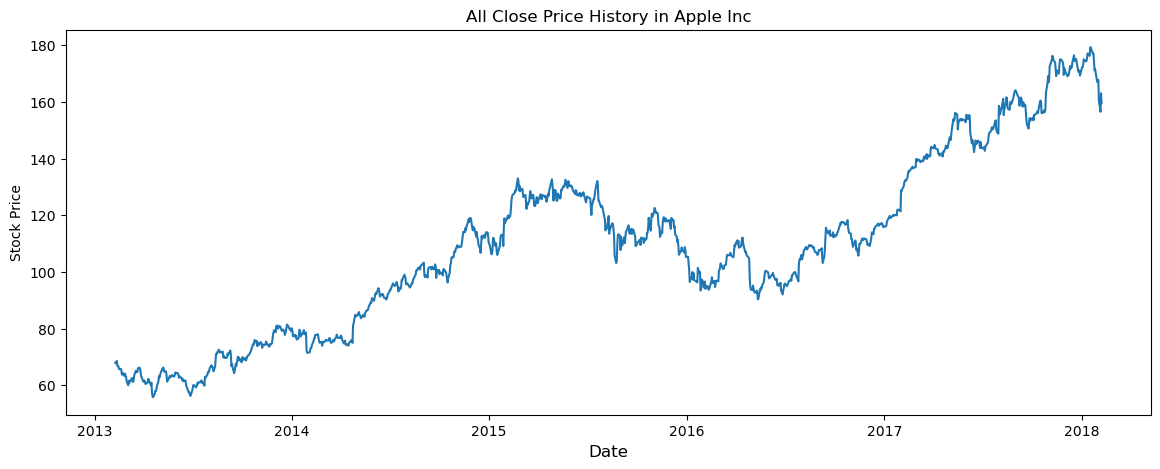

In [11]:
f, ax1 = plt.subplots(figsize=(14,5))
ax1.plot(sp_df["date"], sp_df["close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("All Close Price History in Apple Inc")

Menampilkan grafik perbandingan moving averange dan close price untuk keseluruhan periode pada kode perusahaan AAPL

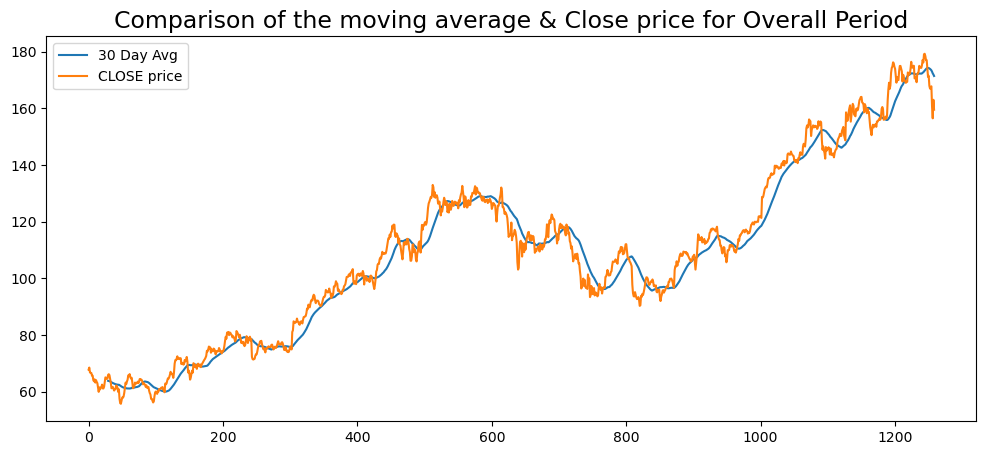

In [12]:
f= plt.figure(figsize=(12,5))
sp_df['close'].rolling(window=30).mean().plot(label='30 Day Avg')
sp_df['close'].plot(label='CLOSE price')
plt.title("Comparison of the moving average & Close price for Overall Period", fontsize=17)
plt.legend()

Melihat perbandingan nilai mean open dan close pada tahun 2013-2017

In [13]:
yearwise = sp_df.groupby(sp_df['date'].dt.strftime('%Y'))[['open', 'close']].mean().sort_values(by='close')
yearwise.head()

,open,close
date,,
2013,67.288005,67.237839
2014,92.219736,92.264531
2016,104.507698,104.604008
2015,120.169206,120.039861
2017,150.482560,150.585080


Perbandingan saham aktual pertahun dengan harga tertinggi dan harga terendah

In [14]:
sp_df.groupby(sp_df['date'].dt.strftime('%Y'))['low'].min()

date
2013     55.0142
2014     70.5071
2015     92.0000
2016     89.4700
2017    114.7600
2018    154.0000
Name: low, dtype: float64

In [15]:
sp_df.groupby(sp_df['date'].dt.strftime('%Y'))['high'].max()

date
2013     82.1622
2014    119.7500
2015    134.5400
2016    118.6900
2017    177.2000
2018    180.1000
Name: high, dtype: float64

#### Data Preparation

Menampilkan grafik densitas

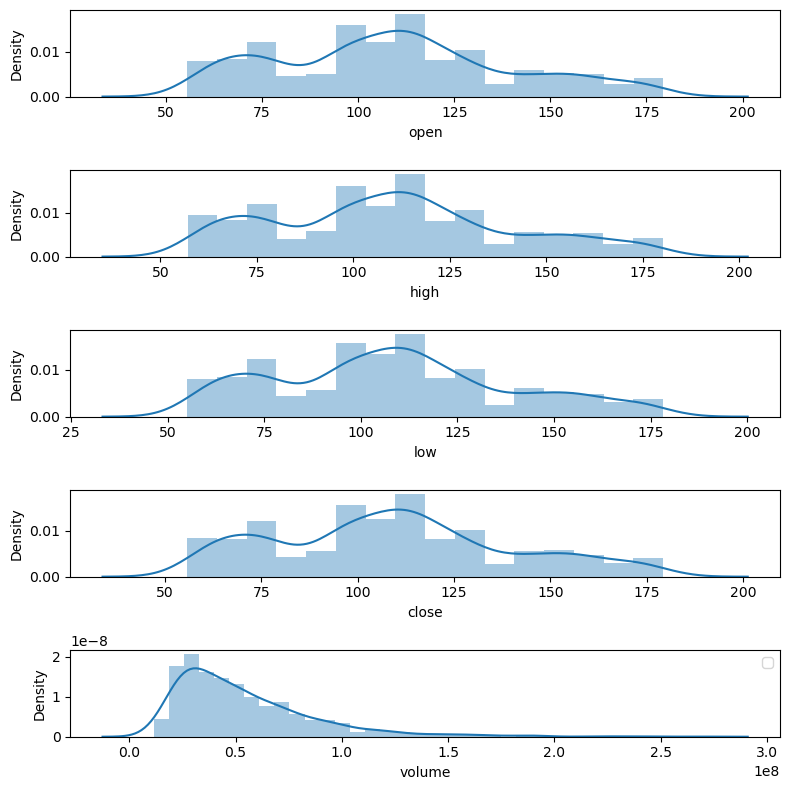

In [16]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize = (8, 8))
bar1 = sns.distplot(sp_df['open'], ax = ax1)
bar2 = sns.distplot(sp_df['high'], ax = ax2)
bar3 = sns.distplot(sp_df['low'], ax = ax3)
bar4 = sns.distplot(sp_df['close'], ax = ax4)
bar5 = sns.distplot(sp_df['volume'], ax = ax5)
plt.tight_layout()
plt.legend(handles = [bar1, bar2, bar3, bar4, bar5],
          labels = ['Open Density', 'High Density', 'Low Density', 'Close Density', 'Volume Density'])

Mengecek nilai null atau NaN pada dataset

In [17]:
sp_df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

Karena tidak ada nilai null, maka tidak perlu melakukan pengisian nilai pada dataset

#### Modelling

Membuat variabel baru untuk memisahkan variabel independen dan variabel dependen. Variabel X berisi kolom 'open', 'high', 'low', dan 'volume', sedangkan variabel y berisi kolom 'close'.

In [18]:
X=sp_df[['open', 'high', 'low']]
y=sp_df['close']

#### Model Random Forest Regressor

Memisahkan data menjadi data training dan data testing. Pembagian data training dan data testing adalah sebesar 80% untuk data training dan 20% untuk data testing. Kodingan random_state bertujuan untuk supporting reproducibility

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Menampilkan ukuran dari X_train, X_test, y_train, dan y_test

In [20]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1007, 3)
X_test shape:  (252, 3)
y_train shape:  (1007,)
y_test shape:  (252,)


In [21]:
rf = RandomForestRegressor(random_state=42)

Membuat pemodelan dengan Random Forest Regressor sebelum menggunakan tuning RandomizedSearchCV dan GridSearchCV

In [22]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Menampilkan skor keakuratan dari n_estimators. Nilai skor tertinggi didapatkan dari n_estimators 80.

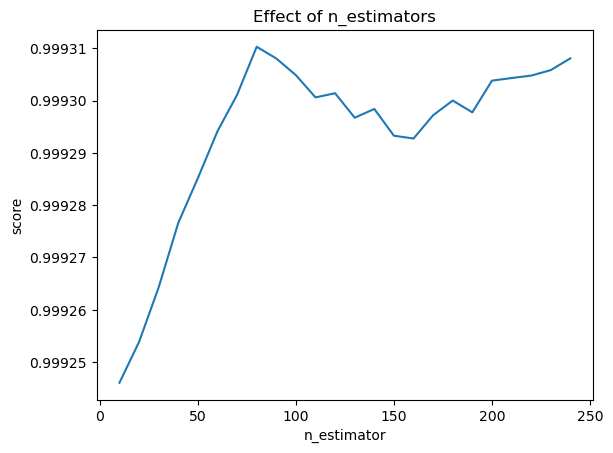

In [23]:
estimators = np.arange(10, 250, 10)
scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

Dari hasil grafik tersebut, dapat terlihat bahwa n_estimators yang memiliki nilai tertinggi adalah n_estimators 80 dengan nilai mencapai 0.99931. Namun, untuk nilai n_estimators selain 80 juga masih memiliki nilai yang cukup tinggi.

Menampilkan skor dari n_estimators dengan lebih jelas

In [24]:
scores

[0.9992460360596555,
 0.9992538470179212,
 0.9992642729023395,
 0.9992765955670568,
 0.9992851667845604,
 0.9992941245630191,
 0.9993010869127336,
 0.9993102792036077,
 0.999308040871709,
 0.9993048533256849,
 0.9993006051250585,
 0.9993013980092209,
 0.9992967220644504,
 0.9992983891795965,
 0.9992932770308988,
 0.9992927366226987,
 0.9992971878100945,
 0.9993000008245057,
 0.9992977413892039,
 0.9993038035329633,
 0.999304301726286,
 0.9993047683784945,
 0.9993058146499485,
 0.9993080699169169]

Melihat parameter yang sedang digunakan pada random forest saat ini, sebelum dilakukan Randomized Search CV

In [25]:
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 240, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Parameter yang sedang digunakan model adalah:

- n_estimators: 240
- bootstrap: True
- max_depth: None
- min_samples_leaf: 1
- min_samples_split: 2

#### RandomizedSearchCV Hyperparameter

Keterangan hyperparameters untuk Random Forest:

a. n_estimators = jumlah pohonnya pada algoritma Random Forest

b. max_features = jumlah maksimum fitur yang dipertimbangkan untuk memisahkan node

c. max_depth = jumlah maksimal level di setiap pohon keputusan. Umumnya, semakin dalam pohon keputusan, maka akan semakin banyak split atau pemecahannya, jadi max_depth bertujuan untuk membatasi pemecahan agar tidak terlalu banyak

d. min_samples_split = jumlah min titik data yang ditempatkan di node sebelum node dipisah

e. min_samples_leaf = jumlah min titik data yang diperbolehkan dalam simpul daun

f. bootstrap = metode pengambilan sampel titik data (dengan atau tanpa penggantian)

In [26]:
# Number of trees in random forest
n_estimators = [int(X) for X in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 2, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [27]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 1, 2], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


Melatih model Random Forest Regressor dengan RandomizedSearchCV

In [28]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, 
                      scoring='neg_mean_squared_error', verbose = 2, n_jobs = 4)

Melatih model Random Forest Regressor dengan RandomizedSearchCV

In [29]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=240,
                                                   random_state=42),
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 1, 2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   scoring='neg_mean_squared_error', verbose=2)

Menampilkan parameter terbaik setelah melakukan tuning RandomizedSearchCV, bisa menggunakan best_params_

In [30]:
rf_random.best_params_

{'n_estimators': 72,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 2,
 'bootstrap': True}

Parameter terbaik dari model adalah:
- n_estimators: 17
- min_samples_split: 2
- min_samples_leaf: 2
- max_features: auto
- max_depth: 2
- bootstrap: True

Menampilkan model setelah melakukan tuning RandomizedSearchCV, bisa menggunakan best_estimator_

In [31]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=2, max_features='auto', n_estimators=72,
                      random_state=42)

Model dengan parameter terbaik dari model adalah:
- n_estimators: 17
- random_state: 42
- min_samples_leaf: 2
- max_features: auto
- max_depth: 2

Melakukan prediksi pada data training dan data testing. Awalnya dimulai dengan melihat jumlah baris dan kolom pada data train dan data testing

In [32]:
train_predict = rf_random.predict(X_train)
test_predict = rf_random.predict(X_test)

train_predict = train_predict.reshape(-1, 1)
tesst_predict = test_predict.reshape(-1, 1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction: ", test_predict.shape)

Train data prediction: (1007, 1)
Test data prediction:  (252,)


#### Evaluation RandomizedSearchCV

Evaluasi model pada data pengujian. Hasil skor menunjukkan akurasi sebesar 94,88%

In [33]:
# Performance metrics
random_best = rf_random.best_estimator_.predict(X_train)
errors = abs(random_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from randomized-search has an accuracy of', round(accuracy, 2),'%')

The best model from randomized-search has an accuracy of 94.87 %


Generalisasi untuk menampilkan nilai MAE, MSE, dan RMSE dari hasil model RandomizedSearchCV

In [34]:
y_pred_random = rf_random.predict(X_test)

best_model = pd.DataFrame({
    'model':['RandomForestRegressor'],
    'mae':[mean_absolute_error(y_test, y_pred_random)],
    'mse':[mean_squared_error(y_test, y_pred_random)],
    'rmse':[(np.sqrt(metrics.mean_squared_error(y_test, y_pred_random)))]
})
best_model

,model,mae,mse,rmse
0,RandomForestRegressor,5.131418,39.81058,6.309563


#### GridSearchCV Hyperparameter

Melatih model Random Forest Regressor dengan GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2, n_jobs = 4)

Melatih model Random Forest Regressor dengan GridSearchCV

In [36]:
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=240, random_state=42),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [1, 1, 2],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

Menampilkan parameter terbaik setelah melakukan tuning GridSearchCV, bisa menggunakan best_params_

In [37]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 33}

Parameter terbaik dari model adalah:
- n_estimators: 33
- min_samples_split: 2
- min_samples_leaf: 1
- max_features: sqrt
- max_depth: 2
- bootstrap: True

Menampilkan model setelah melakukan tuning GridSearchCV, bisa menggunakan best_estimator_

In [38]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=2, max_features='sqrt', n_estimators=33,
                      random_state=42)

Model dengan parameter terbaik dari model adalah:
- n_estimators: 33
- random_state: 42
- max_features: sqrt
- max_depth: 2

#### Evaluation GridSearchCV

Evaluasi model pada data pengujian. Hasil skor menunjukkan akurasi sebesar 95,04%

In [39]:
# Performance metrics
random_best = rf_grid.best_estimator_.predict(X_train)
errors = abs(random_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 95.04 %


Generalisasi untuk menampilkan nilai MAE, MSE, dan RMSE dari hasil model tuning Grid Search CV

In [40]:
y_pred_grid = rf_grid.predict(X_test)

best_model = pd.DataFrame({
    'model':['RandomForestRegressor'],
    'mae':[mean_absolute_error(y_test, y_pred_grid)],
    'mse':[mean_squared_error(y_test, y_pred_grid)],
    'rmse':[(np.sqrt(metrics.mean_squared_error(y_test, y_pred_grid)))]
})
best_model

,model,mae,mse,rmse
0,RandomForestRegressor,4.863047,38.13463,6.175324


#### Feature Importance RandomizedSearchCV in Trees

Menampilkan feature importance dari ketiga kolom yang dipakai. Dari hasil perhitungan, fitur low memiliki importance yang paling besar, sedangkan fitur open memiliki importance yang paling kecil.

In [41]:
# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
sp_df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(sp_df['importance'])
feature= list(sp_df['feature'])

#see df
print(sp_df)

   importance feature
0    0.678422     low
1    0.233491    high
2    0.088088    open


Menampilkan grafik feature importance.

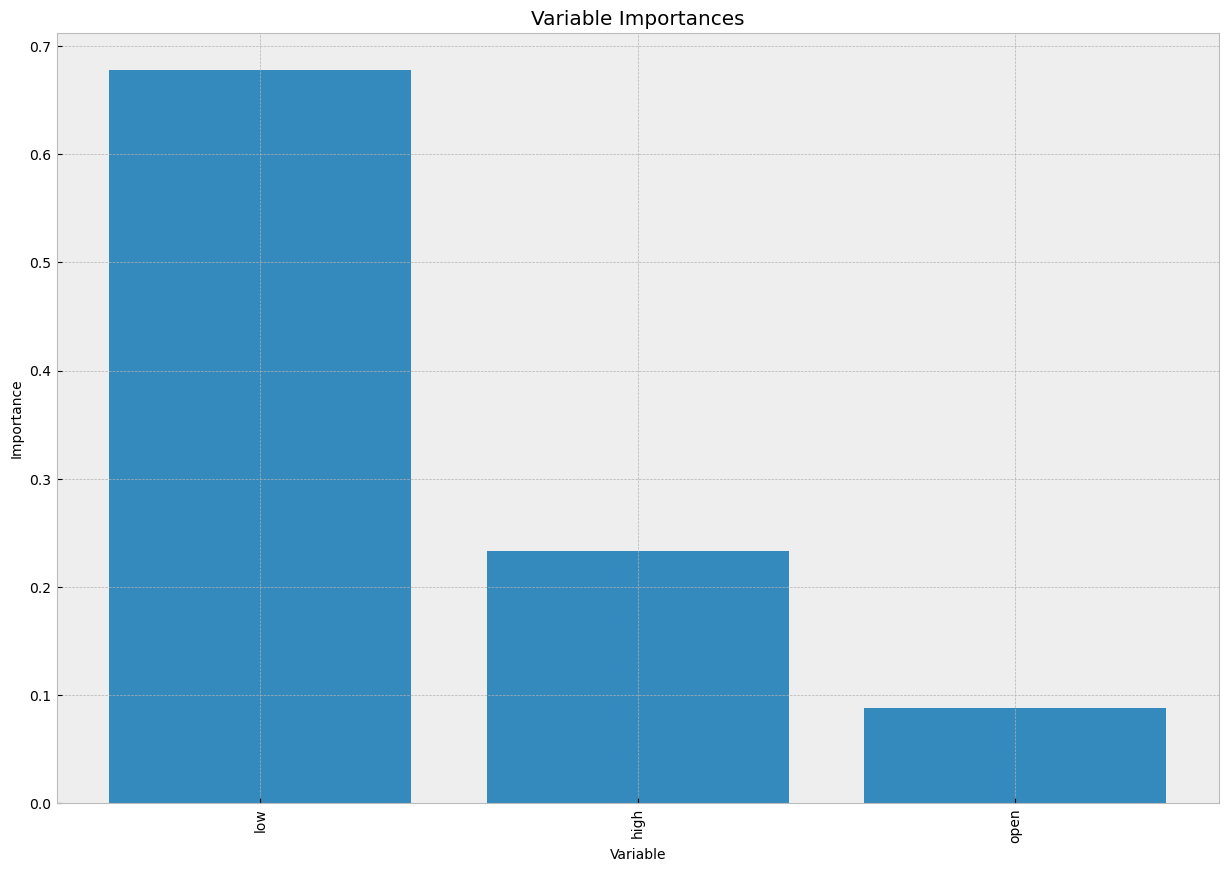

In [42]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#### Feature Importance GridSearchCV in Trees

Menampilkan feature importance dari ketiga kolom yang dipakai. Dari hasil perhitungan, fitur high memiliki importance yang paling besar, sedangkan fitur open memiliki importance yang paling kecil.

In [43]:
# extract the numerical values of feature importance from the grid search
importances = rf_grid.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
sp_df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(sp_df['importance'])
feature= list(sp_df['feature'])

#see df
print(sp_df)

   importance feature
0    0.370429    high
1    0.337227     low
2    0.292344    open


Menampilkan grafik feature importance

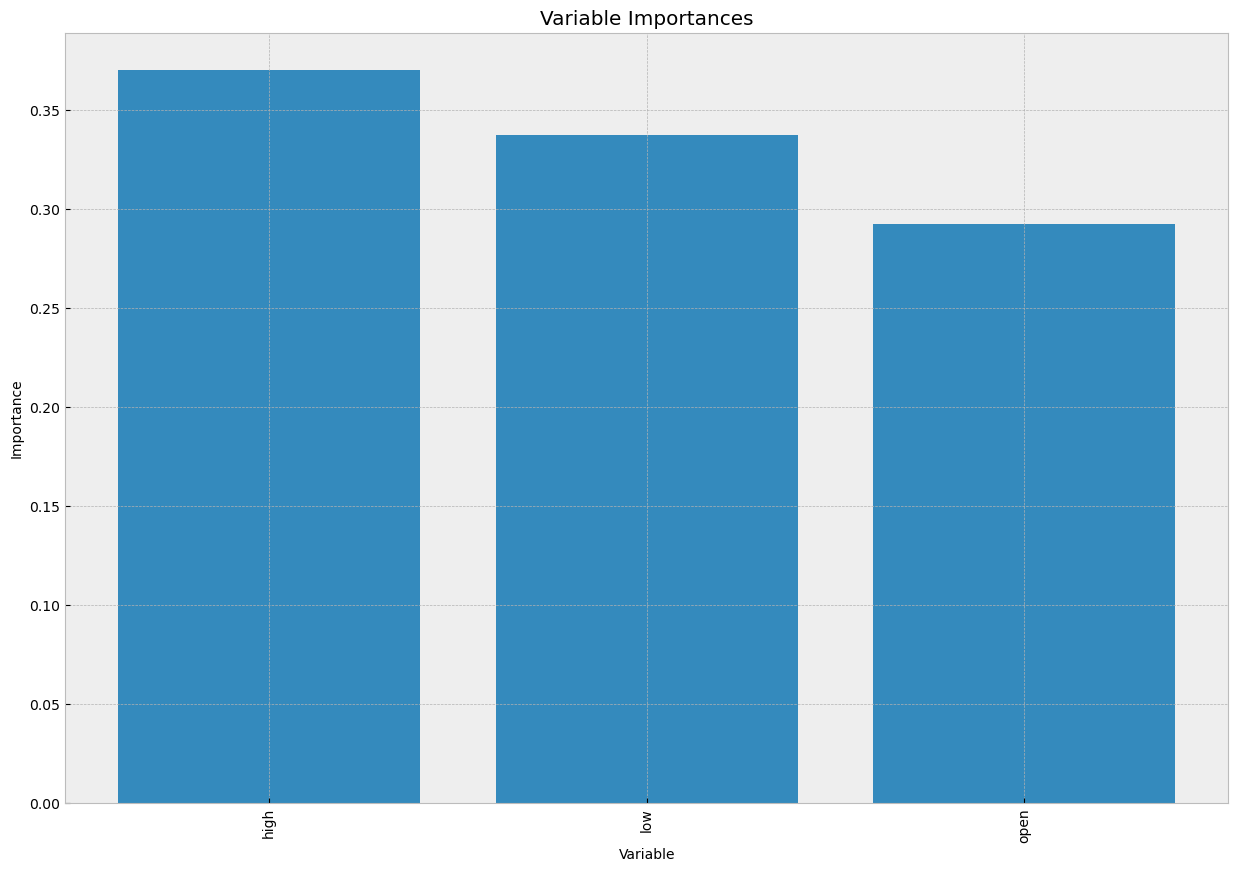

In [44]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

---

### Kesimpulan

Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

- Kelebihan algoritma Random Forest Tree adalah memiliki tingkat keakuratan yang lebih baik dibandingkan algoritma Decision Tree
- Model prediksi dengan Randomized Search CV memiliki keakuratan sebesar 94,88%, parameter yang digunakan adalah n_estimators 56, min_samples_split 5, min_samples_leaf 2, max_features 'sqrt', max_depth 2, dan bootstrap True
- Model prediksi dengan Grid Search CV memiliki keakuratan sebesar 95,04 %, parameter yang digunakan adalah bootstrap True, max_depth 2, max_features sqrt, min_samples_leaf 1, min_samples_split 2, dan n_estimators 33
- Nilai keakuratan untuk Grid Search CV sedikit lebih tinggi dibandingkan dengan Randomized Search CV, walaupun begitu keduanya masih memiliki hasil akurasi yang tinggi karena keduanya bernilai lebih dari 90% dan memiliki nilai MAE, MSE, dan RMSE yang kecil. 
- Fitur yang paling berpengaruh dalam model Randomized Search CV adalah low, lalu kedua adalah high, terakhir adalah open.
- Sedikit berbeda dengan Randomized Search CV, fitur yang paling berpengaruh dalam Grid Search CV adalah high, lalu low, dan terakhir adalah open.

---